# Credit Card Fraud Detection

Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import scipy as sp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef


In [70]:
df = pd.read_csv("C:\Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
df.isnull().any().any()

False

In [73]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
66648,52153.0,1.206860,-0.207262,0.129301,0.463480,0.074433,0.867234,-0.410436,0.313616,0.573543,...,-0.112064,-0.125654,-0.191503,-1.101123,0.574488,0.497454,-0.008864,-0.013876,12.36,0
248597,154009.0,0.222367,0.329456,-0.625403,-2.137413,-0.283366,-0.971408,0.115952,0.328352,0.923567,...,0.165939,0.517126,0.026581,-0.315594,-0.496303,-0.283678,-0.076304,-0.085295,12.57,0
257401,158144.0,-2.192957,0.871155,-1.685731,0.046068,0.215581,-1.487167,0.729020,0.144945,0.353071,...,0.157549,1.077046,0.185203,-0.045718,-0.108250,-0.178968,-0.195880,0.164649,44.00,0
131352,79569.0,-1.618760,0.152608,-0.171854,-0.593997,-3.295499,2.162963,2.248501,0.591127,0.133473,...,-0.034073,0.029248,0.610911,-0.666803,-0.739602,0.718611,0.040293,-0.120433,684.41,0
179857,124267.0,2.124027,-1.148801,0.067993,-0.756321,-1.632027,-0.547061,-1.432105,0.058908,0.542735,...,0.222528,0.680920,0.294016,-0.028192,-0.496766,-0.250545,0.035763,-0.037460,9.53,0


In [74]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [75]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Test Train Split

In [76]:
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']  #Labels

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [78]:
X_test.shape

(56962, 30)

In [79]:
X_train.shape

(227845, 30)

Exploratory Data Analysis

In [80]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [81]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

C:\Users\Karthick\anaconda\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [82]:
#time of the last transaction in days
X_train['Time'].max() / 24

1.9999074074074075

Text(0.5, 1.0, 'Transaction Times')

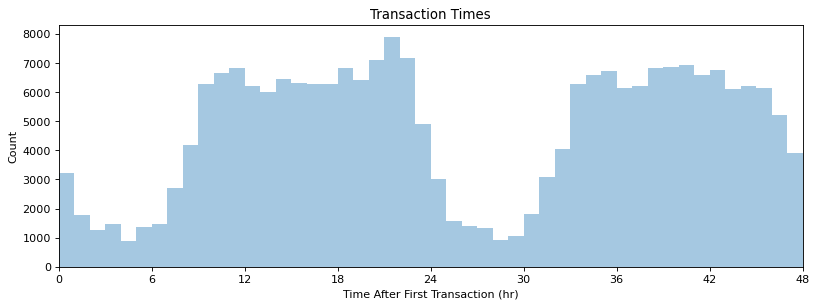

In [83]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [84]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

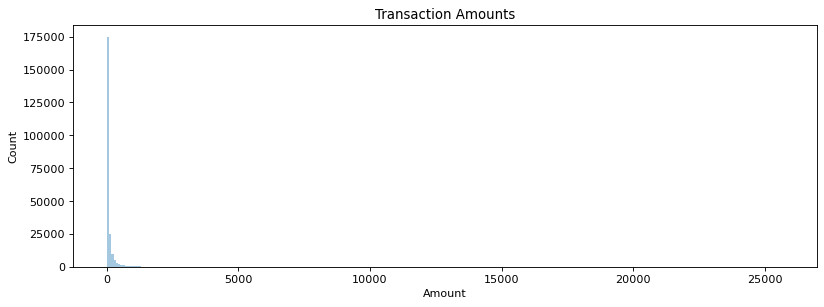

In [85]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

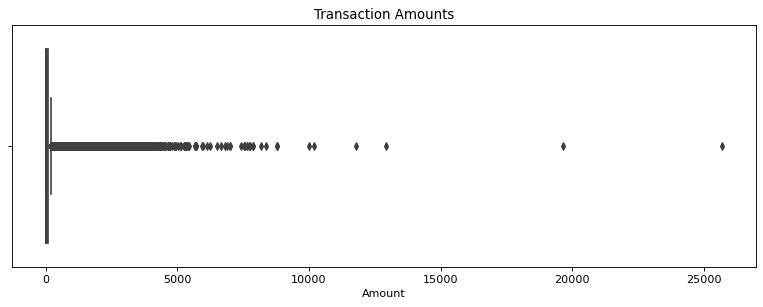

In [86]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [87]:
# Using a power transform to bring the transaction amounts closer to a normal distribution.

X_train['Amount'].skew()

16.910303546516744

In [88]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

C:\Users\Karthick\anaconda\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [89]:
#Perform Box-Cox Transform
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

In [90]:
maxlog

0.1343656979074871

In [91]:
(min_ci, max_ci)

(0.13291390124731134, 0.1358266545085327)

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

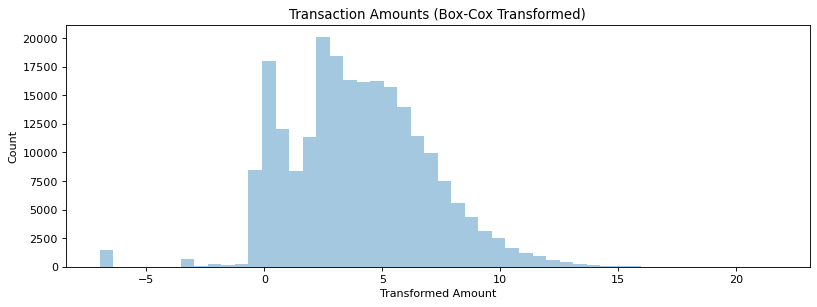

In [92]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [93]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [94]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [95]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

C:\Users\Karthick\anaconda\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


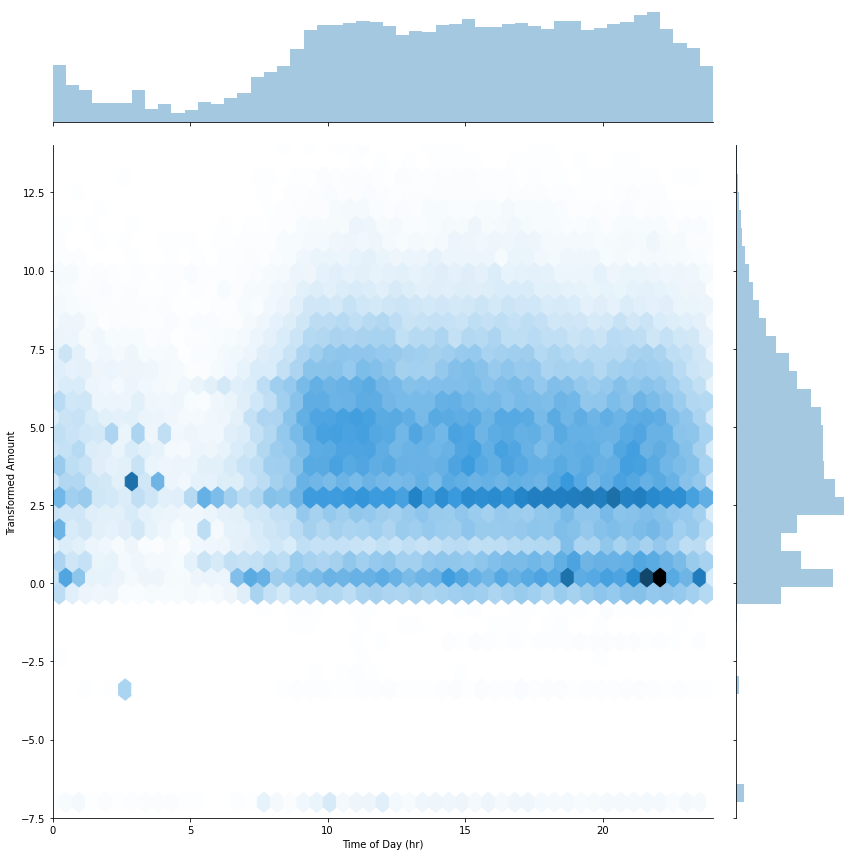

In [96]:
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

In [97]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [98]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,...,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,...,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,...,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,...,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,...,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

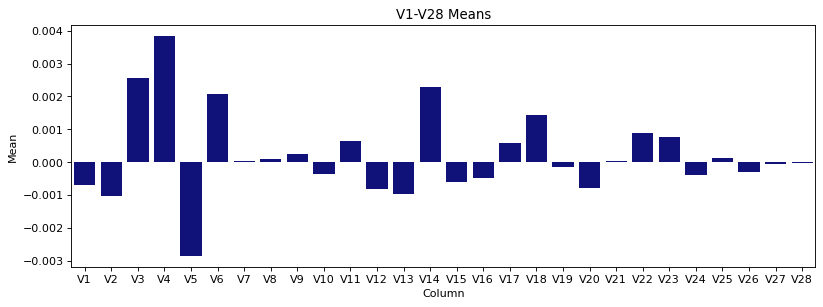

In [99]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [100]:
#All of V1-V28 have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

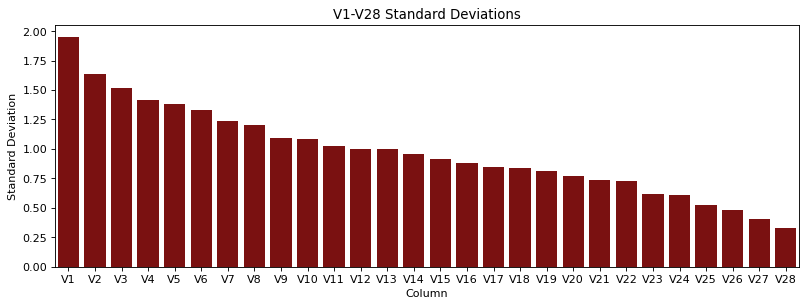

In [101]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

In [102]:
#The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9
#Plotting skewness

Text(0.5, 1.0, 'V1-V28 Skewnesses')

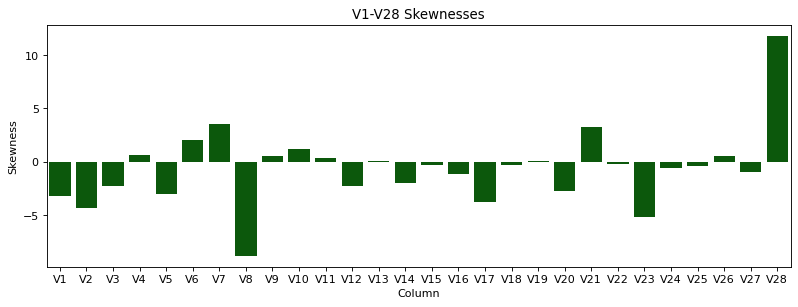

In [103]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

Text(0.5, 1.0, 'V8')

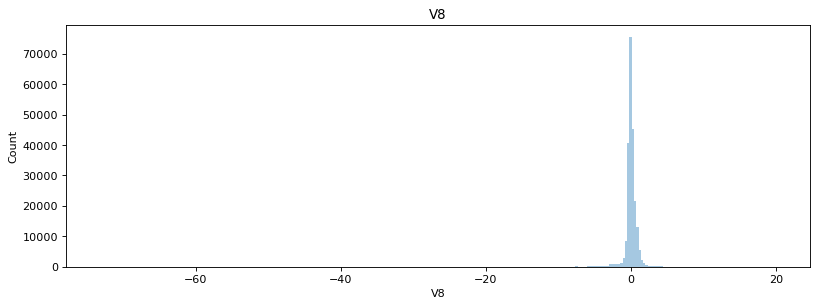

In [104]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')

Text(0.5, 1.0, 'V8')

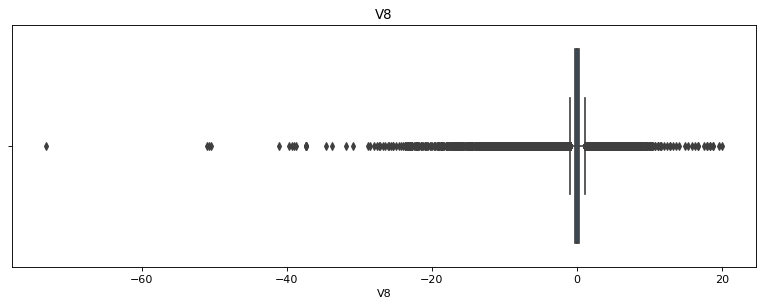

In [105]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

In [106]:
#he boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in V8

Text(0.5, 1.0, 'V1-V28 Kurtoses')

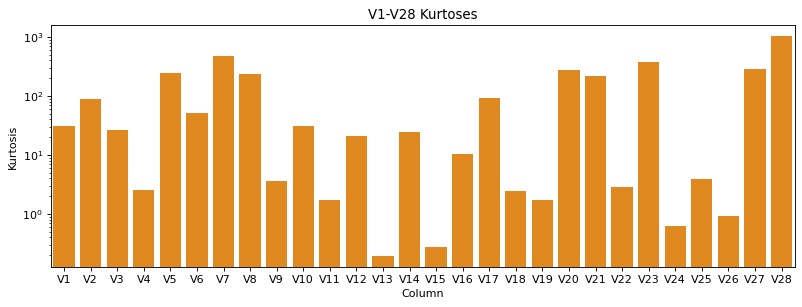

In [107]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5, 1.0, 'V1-V28 Medians')

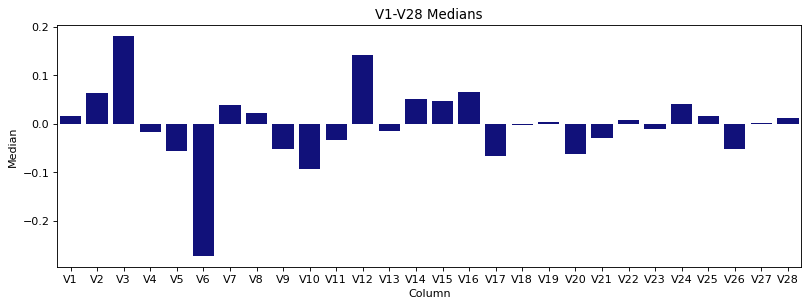

In [108]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5, 1.0, 'V1-V28 IQRs')

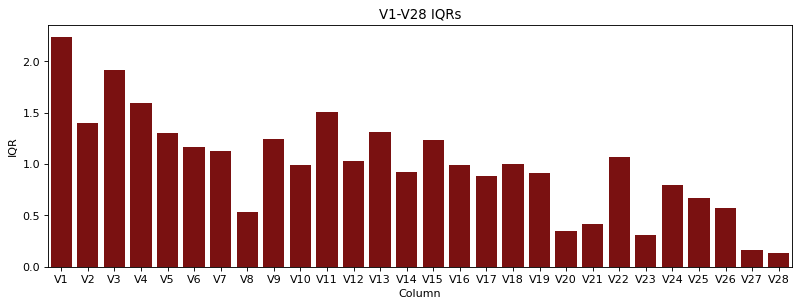

In [109]:
#The medians are also roughly zero. Next let's look at the interquartile ranges 

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

Mutual information is a non-parametric method to estimate the mutual dependence between two variables. Mutual information of 0 indicates no dependence, and higher values indicate higher dependence

In [110]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

In [111]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001422
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

DATA MODELLING

Logistic regression
Support vector classifier
Random forest

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

In [112]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [113]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [114]:
# The type of linear classifier is chosen with the loss hyperparameter. For a linear SVC we set loss = 'hinge', and for logistic regression we set loss = 'log'

In [115]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs',
                        cv=5, verbose=1, return_train_score=False)

In [116]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.2min finished


In [117]:
grid_sgd.best_score_

0.8054381462050987

In [118]:
 grid_sgd.best_params_   

{'model__alpha': 233.57214690901213,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

In [119]:
# linear SVC performed better than logistic regression, and with a high level of regularization 

Random Forest

In [120]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}

In [121]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [122]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [123]:
grid_rf.best_score_

0.8596447282953857

In [124]:
grid_rf.best_params_

{'model__n_estimators': 75}

Evaluation of the Best Model

In [125]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
        
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))


In [126]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[56854    10]
 [   15    83]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962

SCALAR METRICS
          MCC = 0.86919
        AUPRC = 0.85098
        AUROC = 0.95924
Cohen's kappa = 0.86889
     Accuracy = 0.99956


In [ ]:

The random forest is better model, which obtained an MCC of 0.859 on the evaluation experiments.
